In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn import utils
from sklearn import preprocessing
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix


%matplotlib inline


In [2]:
appleapp=pd.read_csv('AppleStore.csv')

##### Checking Null Values

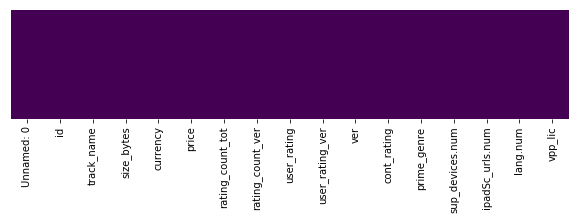

In [3]:
plt.figure(figsize=(10,2))
sns.heatmap(appleapp.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [4]:
appleapp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7197 entries, 0 to 7196
Data columns (total 17 columns):
Unnamed: 0          7197 non-null int64
id                  7197 non-null int64
track_name          7197 non-null object
size_bytes          7197 non-null int64
currency            7197 non-null object
price               7197 non-null float64
rating_count_tot    7197 non-null int64
rating_count_ver    7197 non-null int64
user_rating         7197 non-null float64
user_rating_ver     7197 non-null float64
ver                 7197 non-null object
cont_rating         7197 non-null object
prime_genre         7197 non-null object
sup_devices.num     7197 non-null int64
ipadSc_urls.num     7197 non-null int64
lang.num            7197 non-null int64
vpp_lic             7197 non-null int64
dtypes: float64(3), int64(9), object(5)
memory usage: 955.9+ KB


In [5]:
appleapp.head(10)

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1
5,6,283619399,Shanghai Mahjong,10485713,USD,0.99,8253,5516,4.0,4.0,1.8,4+,Games,47,5,1,1
6,7,283646709,PayPal - Send and request money safely,227795968,USD,0.00,119487,879,4.0,4.5,6.12.0,4+,Finance,37,0,19,1
7,8,284035177,Pandora - Music & Radio,130242560,USD,0.00,1126879,3594,4.0,4.5,8.4.1,12+,Music,37,4,1,1
8,9,284666222,PCalc - The Best Calculator,49250304,USD,9.99,1117,4,4.5,5.0,3.6.6,4+,Utilities,37,5,1,1
9,10,284736660,Ms. PAC-MAN,70023168,USD,3.99,7885,40,4.0,4.0,4.0.4,4+,Games,38,0,10,1


In [6]:
appleapp.drop('Unnamed: 0', inplace=True, axis=1)

##### Created a Column 'size_mb' to convert Bytes into MB and then rounded-off the results

In [7]:
appleapp['size_mb']=appleapp['size_bytes'].apply(lambda x:x/1000000)
appleapp['size_mb'] = appleapp['size_mb'].apply(lambda y: round(y,2)).astype(int)

##### Created a Column 'developer_score' to convert Mobile App Version into a discrete integer

In [8]:
appleapp['developer_score']=appleapp['ver'].apply(lambda x:x[:1])

In [9]:
class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [10]:
appleapp['cont_rating'].unique()

array(['4+', '12+', '17+', '9+'], dtype=object)

In [11]:
def userapproriate(x):
    if x =='4+':
        return 'Toddler rated'
    if x =='9+':
        return 'Kids rated'
    if x =='12+':
        return 'Teenagers rated'
    else:
        return 'Adult rated'

appleapp['age_approriate']=appleapp['cont_rating'].apply(lambda x:userapproriate(x))

##### Most Rated App (Highest Total Rating Count)

In [12]:
appleapp[appleapp['rating_count_tot']==appleapp['rating_count_tot'].max()][['track_name',
                                                                            'developer_score','size_mb',
                                                                            'age_approriate']]

,track_name,developer_score,size_mb,age_approriate
16,Facebook,9,389,Toddler rated



## *** Top 5 App with Avg. User Rating Count ***
#### Earlier, Facebook was the most rated app since it's number of users were maximum. 
#### But if we see Average Rating per user, the story is different:

In [13]:
appleapp[appleapp['user_rating']==appleapp['user_rating'].max()][['track_name',
                                                                  'developer_score','size_mb','age_approriate',
                                                                  'price']].head(5)

,track_name,developer_score,size_mb,age_approriate,price
21,:) Sudoku +,5,6,Toddler rated,2.99
230,King of Dragon Pass,2,364,Teenagers rated,9.99
271,TurboScan™ Pro - document & receipt scanner: s...,2,8,Toddler rated,4.99
302,Plants vs. Zombies,1,105,Kids rated,0.99
318,Learn to Speak Spanish Fast With MosaLingua,9,48,Teenagers rated,4.99


##### Dropping Few Columns which we won't be using in EDA and ML Modeling

In [14]:
appleapp.drop(['size_bytes', 'currency', 'rating_count_tot', 'rating_count_ver', 
               'ver', 'cont_rating'], axis=1, inplace=True)

In [15]:
appleapp.columns

Index(['id', 'track_name', 'price', 'user_rating', 'user_rating_ver',
       'prime_genre', 'sup_devices.num', 'ipadSc_urls.num', 'lang.num',
       'vpp_lic', 'size_mb', 'developer_score', 'age_approriate'],
      dtype='object')

In [16]:
appleapp.head()

,id,track_name,price,user_rating,user_rating_ver,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,size_mb,developer_score,age_approriate
0,281656475,PAC-MAN Premium,3.99,4.0,4.5,Games,38,5,10,1,100,6,Toddler rated
1,281796108,Evernote - stay organized,0.00,4.0,3.5,Productivity,37,5,23,1,158,8,Toddler rated
2,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",0.00,3.5,4.5,Weather,37,5,3,1,100,5,Toddler rated
3,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",0.00,4.0,4.5,Shopping,37,5,9,1,128,5,Teenagers rated
4,282935706,Bible,0.00,4.5,5.0,Reference,37,5,45,1,92,7,Toddler rated


In [17]:
appleapp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7197 entries, 0 to 7196
Data columns (total 13 columns):
id                 7197 non-null int64
track_name         7197 non-null object
price              7197 non-null float64
user_rating        7197 non-null float64
user_rating_ver    7197 non-null float64
prime_genre        7197 non-null object
sup_devices.num    7197 non-null int64
ipadSc_urls.num    7197 non-null int64
lang.num           7197 non-null int64
vpp_lic            7197 non-null int64
size_mb            7197 non-null int64
developer_score    7197 non-null object
age_approriate     7197 non-null object
dtypes: float64(3), int64(6), object(4)
memory usage: 731.0+ KB


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


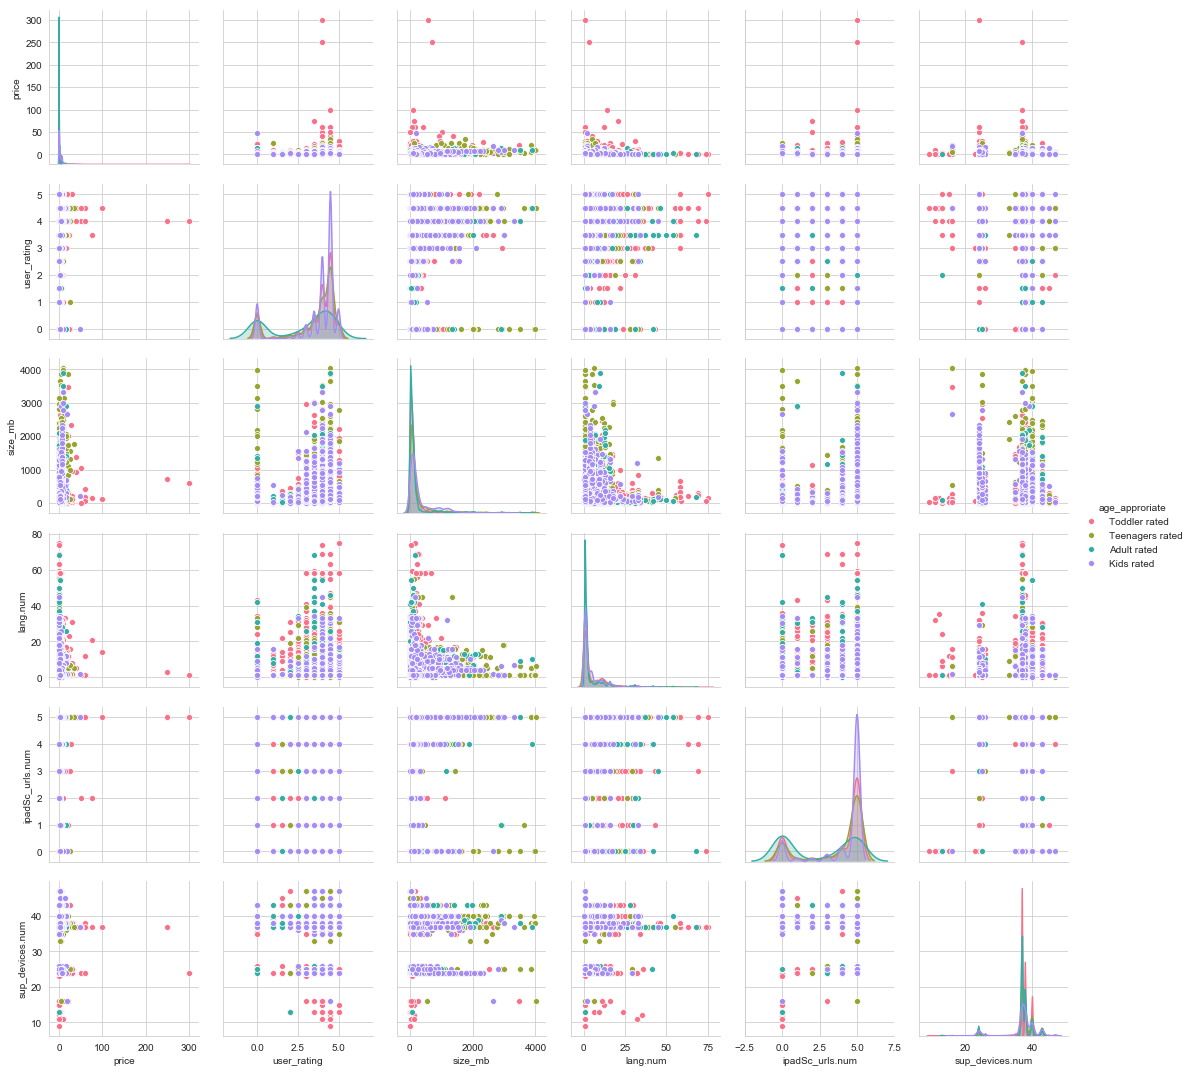

In [18]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize']=(10,10)
sns.pairplot(appleapp[['price','user_rating','prime_genre','size_mb','lang.num','ipadSc_urls.num', 'sup_devices.num','developer_score','age_approriate']],
             kind='scatter', palette='husl', hue='age_approriate')

Text(0.5, 1.0, 'Apple App Store Parameters Correlation')

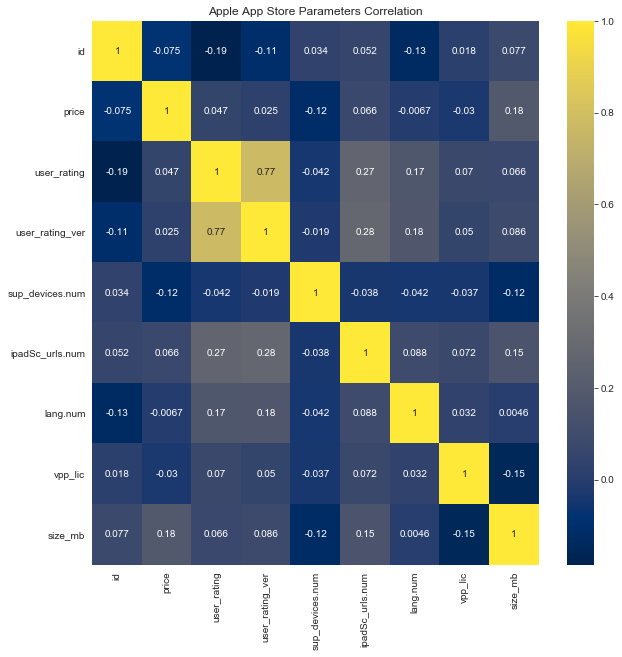

In [19]:
sns.heatmap(appleapp.corr(),cmap='cividis', annot=True)
plt.title('Apple App Store Parameters Correlation')

In [20]:
appleapp.columns

Index(['id', 'track_name', 'price', 'user_rating', 'user_rating_ver',
       'prime_genre', 'sup_devices.num', 'ipadSc_urls.num', 'lang.num',
       'vpp_lic', 'size_mb', 'developer_score', 'age_approriate'],
      dtype='object')

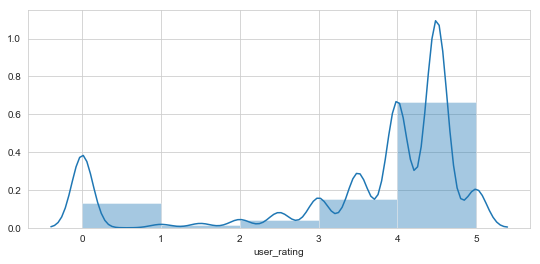

In [21]:
plt.figure(figsize=(9,4))
sns.distplot(appleapp['user_rating'], bins=5)

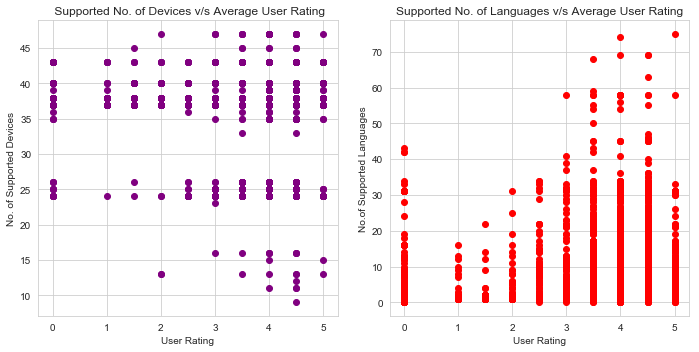

In [22]:
fig, axes =plt.subplots(nrows=1, ncols=2, figsize=(10,5))

axes[0].scatter(appleapp['user_rating'], appleapp['sup_devices.num'],  color='purple')
axes[1].scatter(appleapp['user_rating'],appleapp['lang.num'], color='red')

axes[0].set_title(' Supported No. of Devices v/s Average User Rating')
axes[0].set_xlabel('User Rating')
axes[0].set_ylabel('No. of Supported Devices')

axes[1].set_title('Supported No. of Languages v/s Average User Rating')
axes[1].set_xlabel('User Rating')
axes[1].set_ylabel('No.of Supported Languages')
plt.tight_layout()

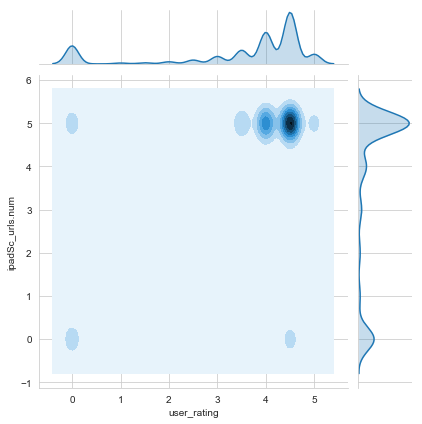

In [23]:
sns.jointplot(x='user_rating',y='ipadSc_urls.num', data=appleapp, kind='kde')

Text(0.5, 0.98, 'price v/s user ratings')

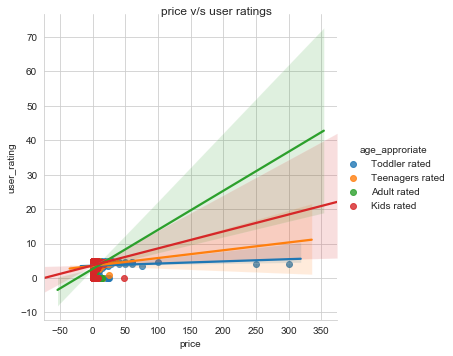

In [24]:
lm1=sns.lmplot(x='price',y='user_rating',data=appleapp,hue='age_approriate')
fig1=lm1.fig
fig1.suptitle('price v/s user ratings')

Text(0.5, 0.98, 'Size of App v/s user ratings')

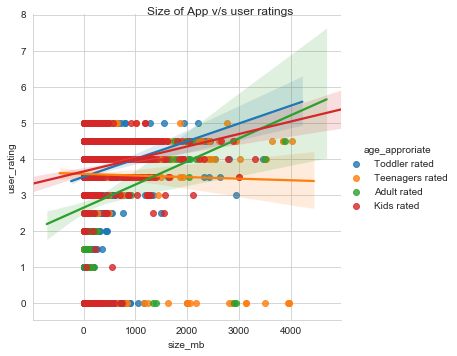

In [25]:
lm2=sns.lmplot(x='size_mb',y='user_rating',data=appleapp, hue='age_approriate')
fig2=lm2.fig
fig2.suptitle('Size of App v/s user ratings')

## ML Modeling


#### Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
le_dict = {}
for col in appleapp.dtypes[appleapp.dtypes=="object"].index:
    print(col)
    le_dict[col] = preprocessing.LabelEncoder()
    appleapp[col] = le_dict[col].fit_transform(appleapp[col].astype(str))

track_name
prime_genre
developer_score
age_approriate


In [28]:
appleapp.head()

,id,track_name,price,user_rating,user_rating_ver,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,size_mb,developer_score,age_approriate
0,281656475,3676,3.99,4.0,4.5,7,38,5,10,1,100,6,3
1,281796108,1664,0.00,4.0,3.5,15,37,5,23,1,158,8,3
2,281940292,5870,0.00,3.5,4.5,22,37,5,3,1,100,5,3
3,282614216,6132,0.00,4.0,4.5,17,37,5,9,1,128,5,2
4,282935706,527,0.00,4.5,5.0,16,37,5,45,1,92,7,3


In [29]:
appleapp.columns

Index(['id', 'track_name', 'price', 'user_rating', 'user_rating_ver',
       'prime_genre', 'sup_devices.num', 'ipadSc_urls.num', 'lang.num',
       'vpp_lic', 'size_mb', 'developer_score', 'age_approriate'],
      dtype='object')

In [30]:
X=appleapp[['id', 'track_name', 'price', 'user_rating_ver',
       'prime_genre', 'sup_devices.num', 'ipadSc_urls.num', 'lang.num',
       'vpp_lic', 'size_mb', 'developer_score', 'age_approriate']].astype(int)

y=appleapp['user_rating'].astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [31]:
lm=LogisticRegression()
lm.fit(X_train, y_train)
predictions=lm.predict(X_test)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [32]:
print('Classification Report \n', classification_report(y_test, predictions))

Classification Report 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       284
           1       0.00      0.00      0.00        30
           2       0.00      0.00      0.00        97
           3       0.00      0.00      0.00       326
           4       0.59      1.00      0.74      1282
           5       0.00      0.00      0.00       141

   micro avg       0.59      0.59      0.59      2160
   macro avg       0.10      0.17      0.12      2160
weighted avg       0.35      0.59      0.44      2160



/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### K Nearest Neighbor

In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(appleapp.drop('user_rating', axis=1))

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [34]:
scaled_features = scaler.transform(appleapp.drop('user_rating', axis=1))

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [35]:
appleapp.columns

Index(['id', 'track_name', 'price', 'user_rating', 'user_rating_ver',
       'prime_genre', 'sup_devices.num', 'ipadSc_urls.num', 'lang.num',
       'vpp_lic', 'size_mb', 'developer_score', 'age_approriate'],
      dtype='object')

In [36]:
scaled_df = pd.DataFrame(scaled_features)
scaled_df.columns = ['id', 'track_name', 'price', 'user_rating_ver',
       'prime_genre', 'sup_devices.num', 'ipadSc_urls.num', 'lang.num',
       'vpp_lic', 'size_mb', 'developer_score', 'age_approriate']
scaled_df.head()

,id,track_name,price,user_rating_ver,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,size_mb,developer_score,age_approriate
0,-2.143939,0.037931,0.388126,0.688921,-0.324940,0.170753,0.651051,0.576471,0.083642,-0.274628,2.303336,0.692249
1,-2.143424,-0.930828,-0.295960,0.136202,1.319353,-0.096808,0.651051,2.218083,0.083642,-0.113150,3.466275,0.692249
2,-2.142892,1.094321,-0.295960,0.688921,2.758109,-0.096808,0.651051,-0.307474,0.083642,-0.274628,1.721867,0.692249
3,-2.140407,1.220472,-0.295960,0.688921,1.730426,-0.096808,0.651051,0.450193,0.083642,-0.196673,1.721867,-0.305172
4,-2.139222,-1.478282,-0.295960,0.965281,1.524889,-0.096808,0.651051,4.996197,0.083642,-0.296901,2.884806,0.692249


In [37]:
X=scaled_features
y=appleapp['user_rating'].astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [38]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [39]:
predictions=knn.predict(X_test)

In [40]:
print('\n Confusion Matrix: \n', confusion_matrix(y_test, predictions))
print('\n Classification Report: \n', classification_report(y_test, predictions))


 Confusion Matrix: 
 [[ 247    2    7   11   16    1]
 [  14    2    4    5    5    0]
 [  14   10   20   27   24    2]
 [  30    7   26   78  183    2]
 [  48   14   24  100 1065   31]
 [  11    0    5   12   97   16]]

 Classification Report: 
               precision    recall  f1-score   support

           0       0.68      0.87      0.76       284
           1       0.06      0.07      0.06        30
           2       0.23      0.21      0.22        97
           3       0.33      0.24      0.28       326
           4       0.77      0.83      0.80      1282
           5       0.31      0.11      0.17       141

   micro avg       0.66      0.66      0.66      2160
   macro avg       0.40      0.39      0.38      2160
weighted avg       0.63      0.66      0.64      2160



In [41]:
error_rate=[]

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i=knn.predict(X_test)
    error_rate.append(np.mean(pred_i!=y_test))
    

Text(0, 0.5, 'Error Rate')

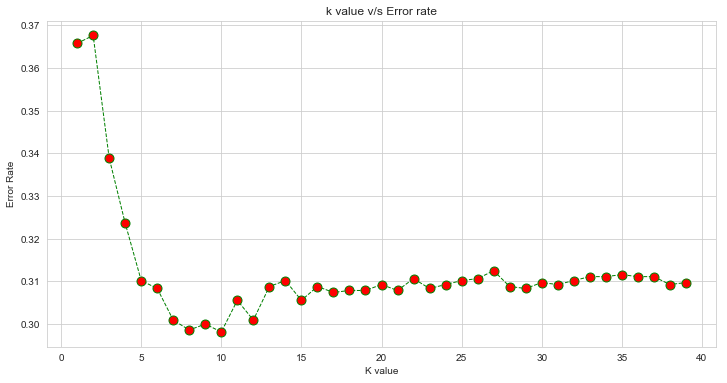

In [42]:
plt.figure(figsize=(12,6))
plt.plot(range(1,40), error_rate, color='green', marker='o', linestyle='dashed', linewidth=1, 
         markerfacecolor='red', markersize=9)
plt.title('k value v/s Error rate')
plt.xlabel('K value')
plt.ylabel('Error Rate')

In [43]:
knn_newk=KNeighborsClassifier(n_neighbors=8)
knn_newk.fit(X_train, y_train)
predictions_newk=knn_newk.predict(X_test)


In [44]:
from sklearn.metrics import classification_report, confusion_matrix
print('Confusion matrix: \n', confusion_matrix(y_test, predictions_newk))
print('\n\n Classification Report: \n', classification_report(y_test, predictions_newk))

Confusion matrix: 
 [[ 255    2    3   11   13    0]
 [  15    3    2    6    4    0]
 [  14    1   17   32   32    1]
 [  31    1   11   72  210    1]
 [  46    0    8   62 1159    7]
 [  11    0    1    5  115    9]]


 Classification Report: 
               precision    recall  f1-score   support

           0       0.69      0.90      0.78       284
           1       0.43      0.10      0.16        30
           2       0.40      0.18      0.24        97
           3       0.38      0.22      0.28       326
           4       0.76      0.90      0.82      1282
           5       0.50      0.06      0.11       141

   micro avg       0.70      0.70      0.70      2160
   macro avg       0.53      0.39      0.40      2160
weighted avg       0.65      0.70      0.65      2160

